<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/2ndWeekTasks/Logistic_Regression_on_CitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 2 : Classification model: Klasifikasi kualitas air sungai citarum (logistics model)

Dataset : CitarumWater.csv

Dokumentasi Chat GPT : [Link](https://chatgpt.com/share/6700eb2b-0b24-8005-b426-df8b8a9d6f5d)

# **Prompt ChatGPT : berikan kode untuk menyambungkan google drive dengan google colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Prompt ChatGPT : berikan kode untuk membuat model Classification dengan logistics model dengan CitarumWater.csv**

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix



In [10]:
# Memuat Dataset
path = "/content/drive/MyDrive/Dataset/CitarumWater.csv"
data = pd.read_csv(path)

In [11]:
data.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [12]:
data

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.570000,25.55°C,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.690000,25.55°C,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.390000,25.55°C,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.490000,25.55°C,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.170000,25.55°C,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2


In [14]:
# Step 3: Preprocessing (Feature Selection)
# We will exclude 'No', 'NamaSungai', 'TitikPantau', 'Waktu', and non-numerical 'O2' and 'Temp'
X = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Class', 'O2', 'Temp'])
y = data['Class']

In [15]:
# Step 4: Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Step 5: Scaling features (Logistic regression performs better with scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Step 6: Create the Logistic Regression model
model = LogisticRegression()

In [18]:
# Train the model
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_scaled)

In [19]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
# Print results
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 95.80%
Confusion Matrix:
[[184  12   0   0]
 [  8 286   0   0]
 [  0   1   5   0]
 [  0   0   0   4]]
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       196
           2       0.96      0.97      0.96       294
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         4

    accuracy                           0.96       500
   macro avg       0.98      0.94      0.96       500
weighted avg       0.96      0.96      0.96       500



# **Promt ChatGPT : tolong berikan kode untuk memvisualisasikan data diatas**

In [22]:
# Step 2: Set up visualization style
sns.set(style="whitegrid")

In [23]:
# Step 3: Distribution of each numerical feature using histograms
numerical_cols = ['pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']

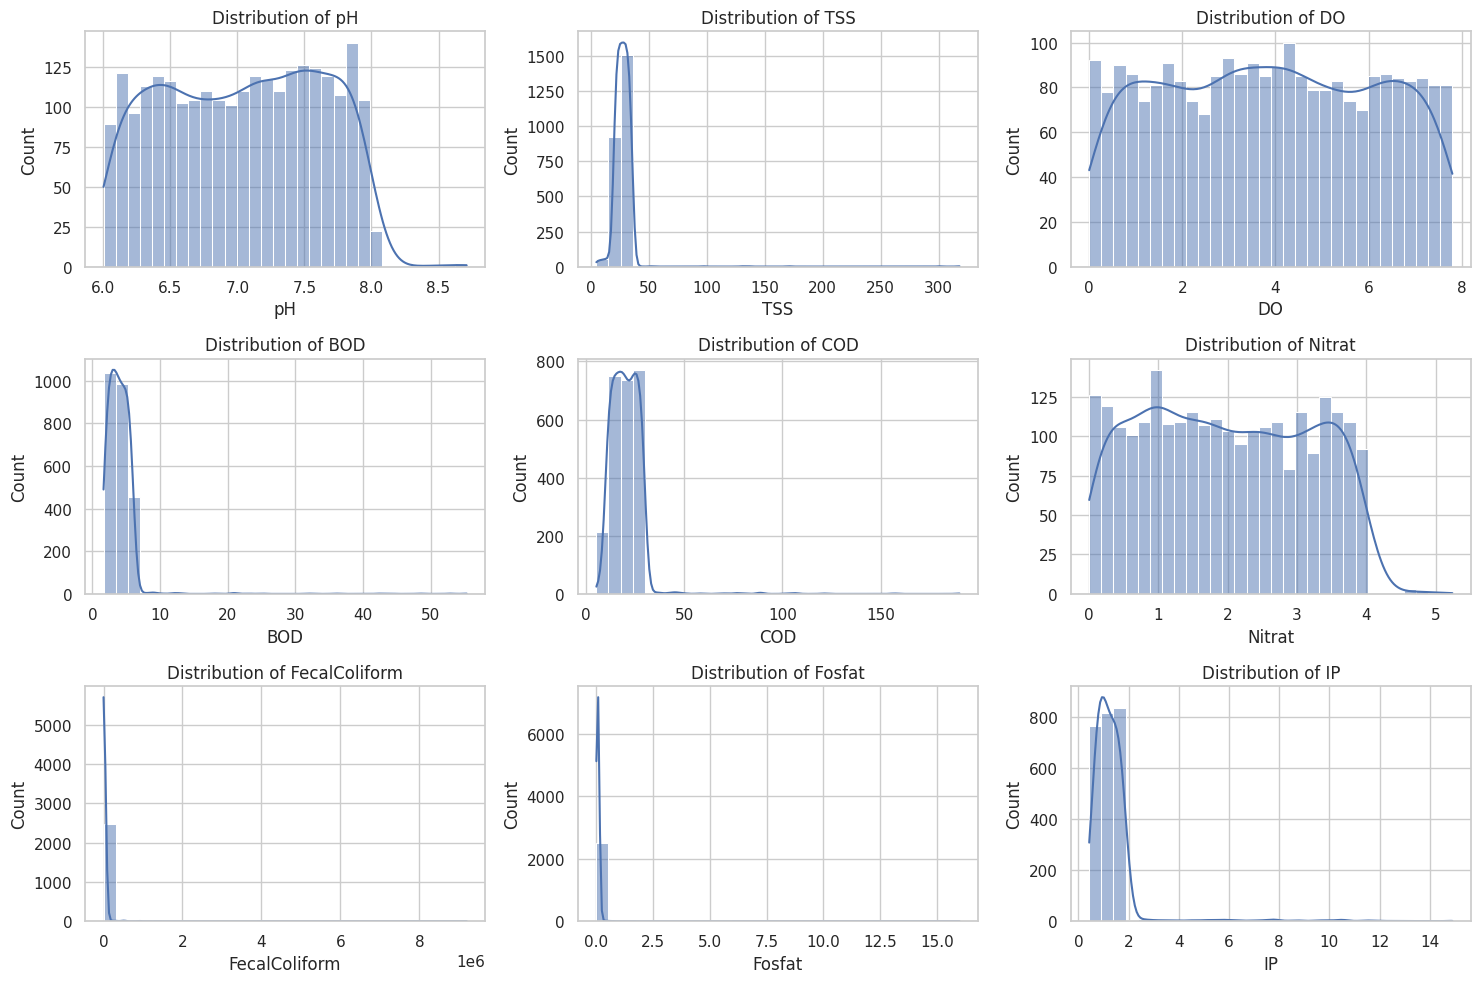

In [24]:
# Plot histograms for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

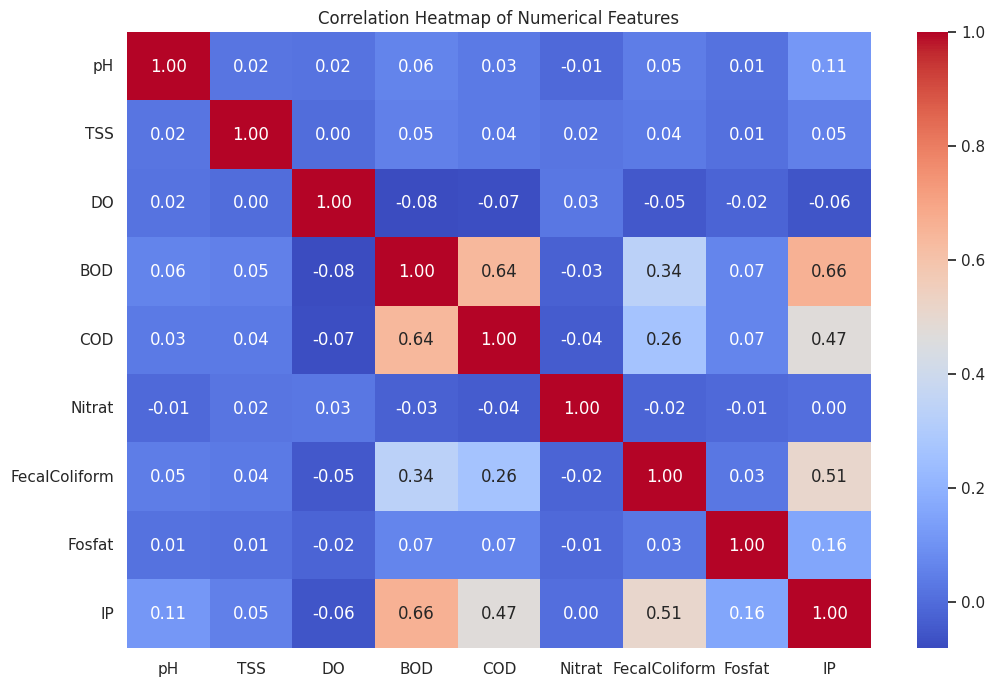

In [25]:
# Step 4: Heatmap for correlation between features
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

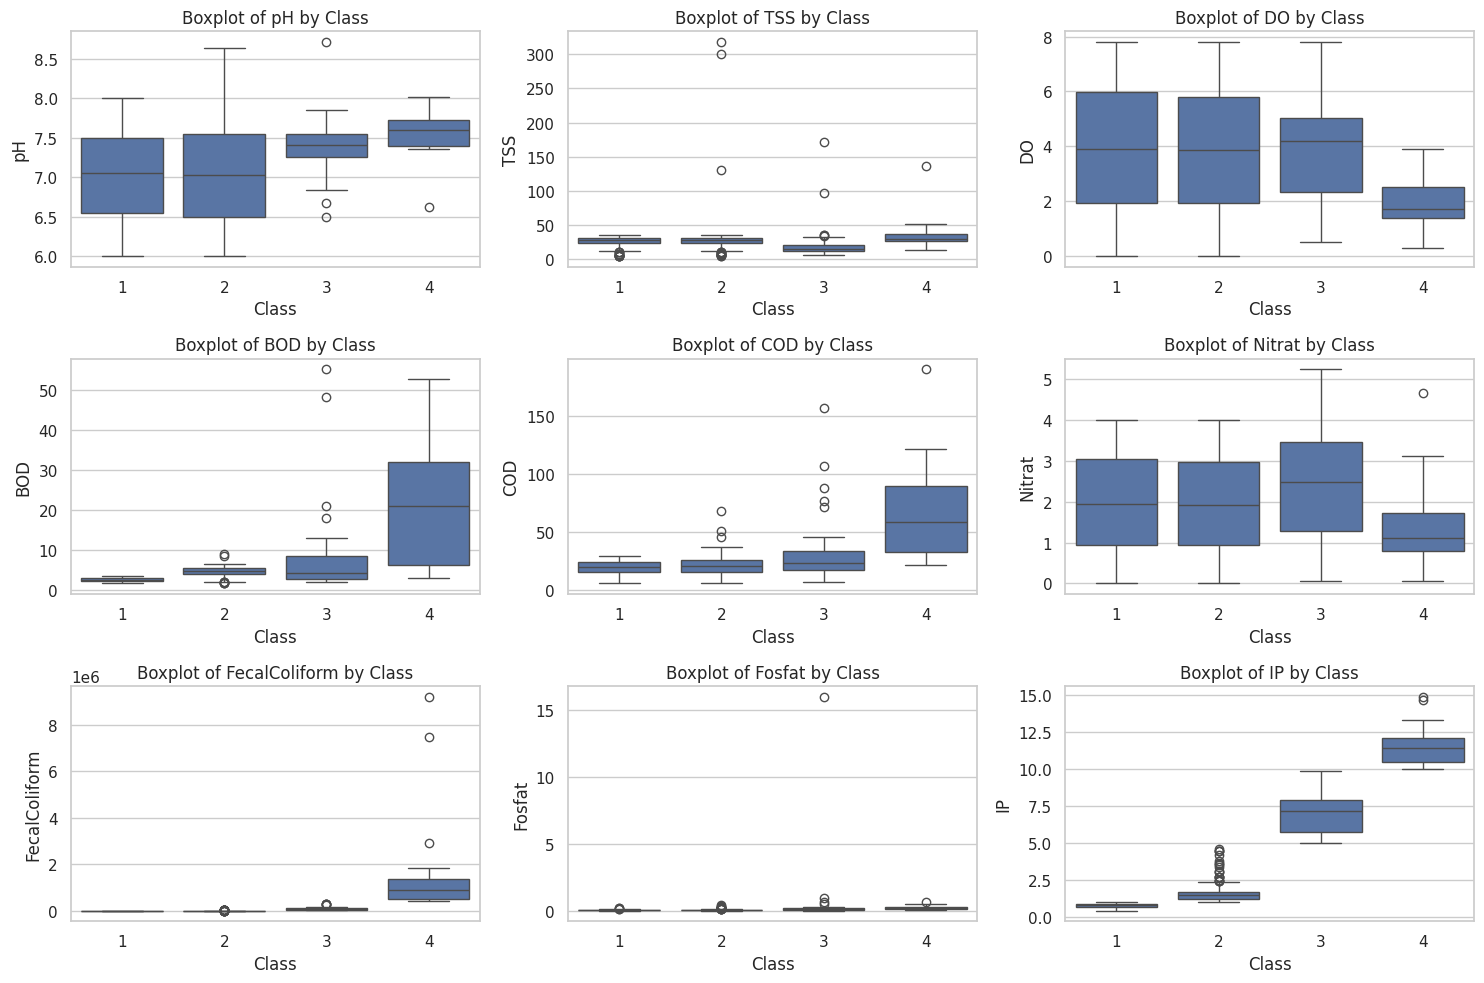

In [26]:
# Step 5: Boxplot for each feature to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data['Class'], y=data[col])
    plt.title(f'Boxplot of {col} by Class')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

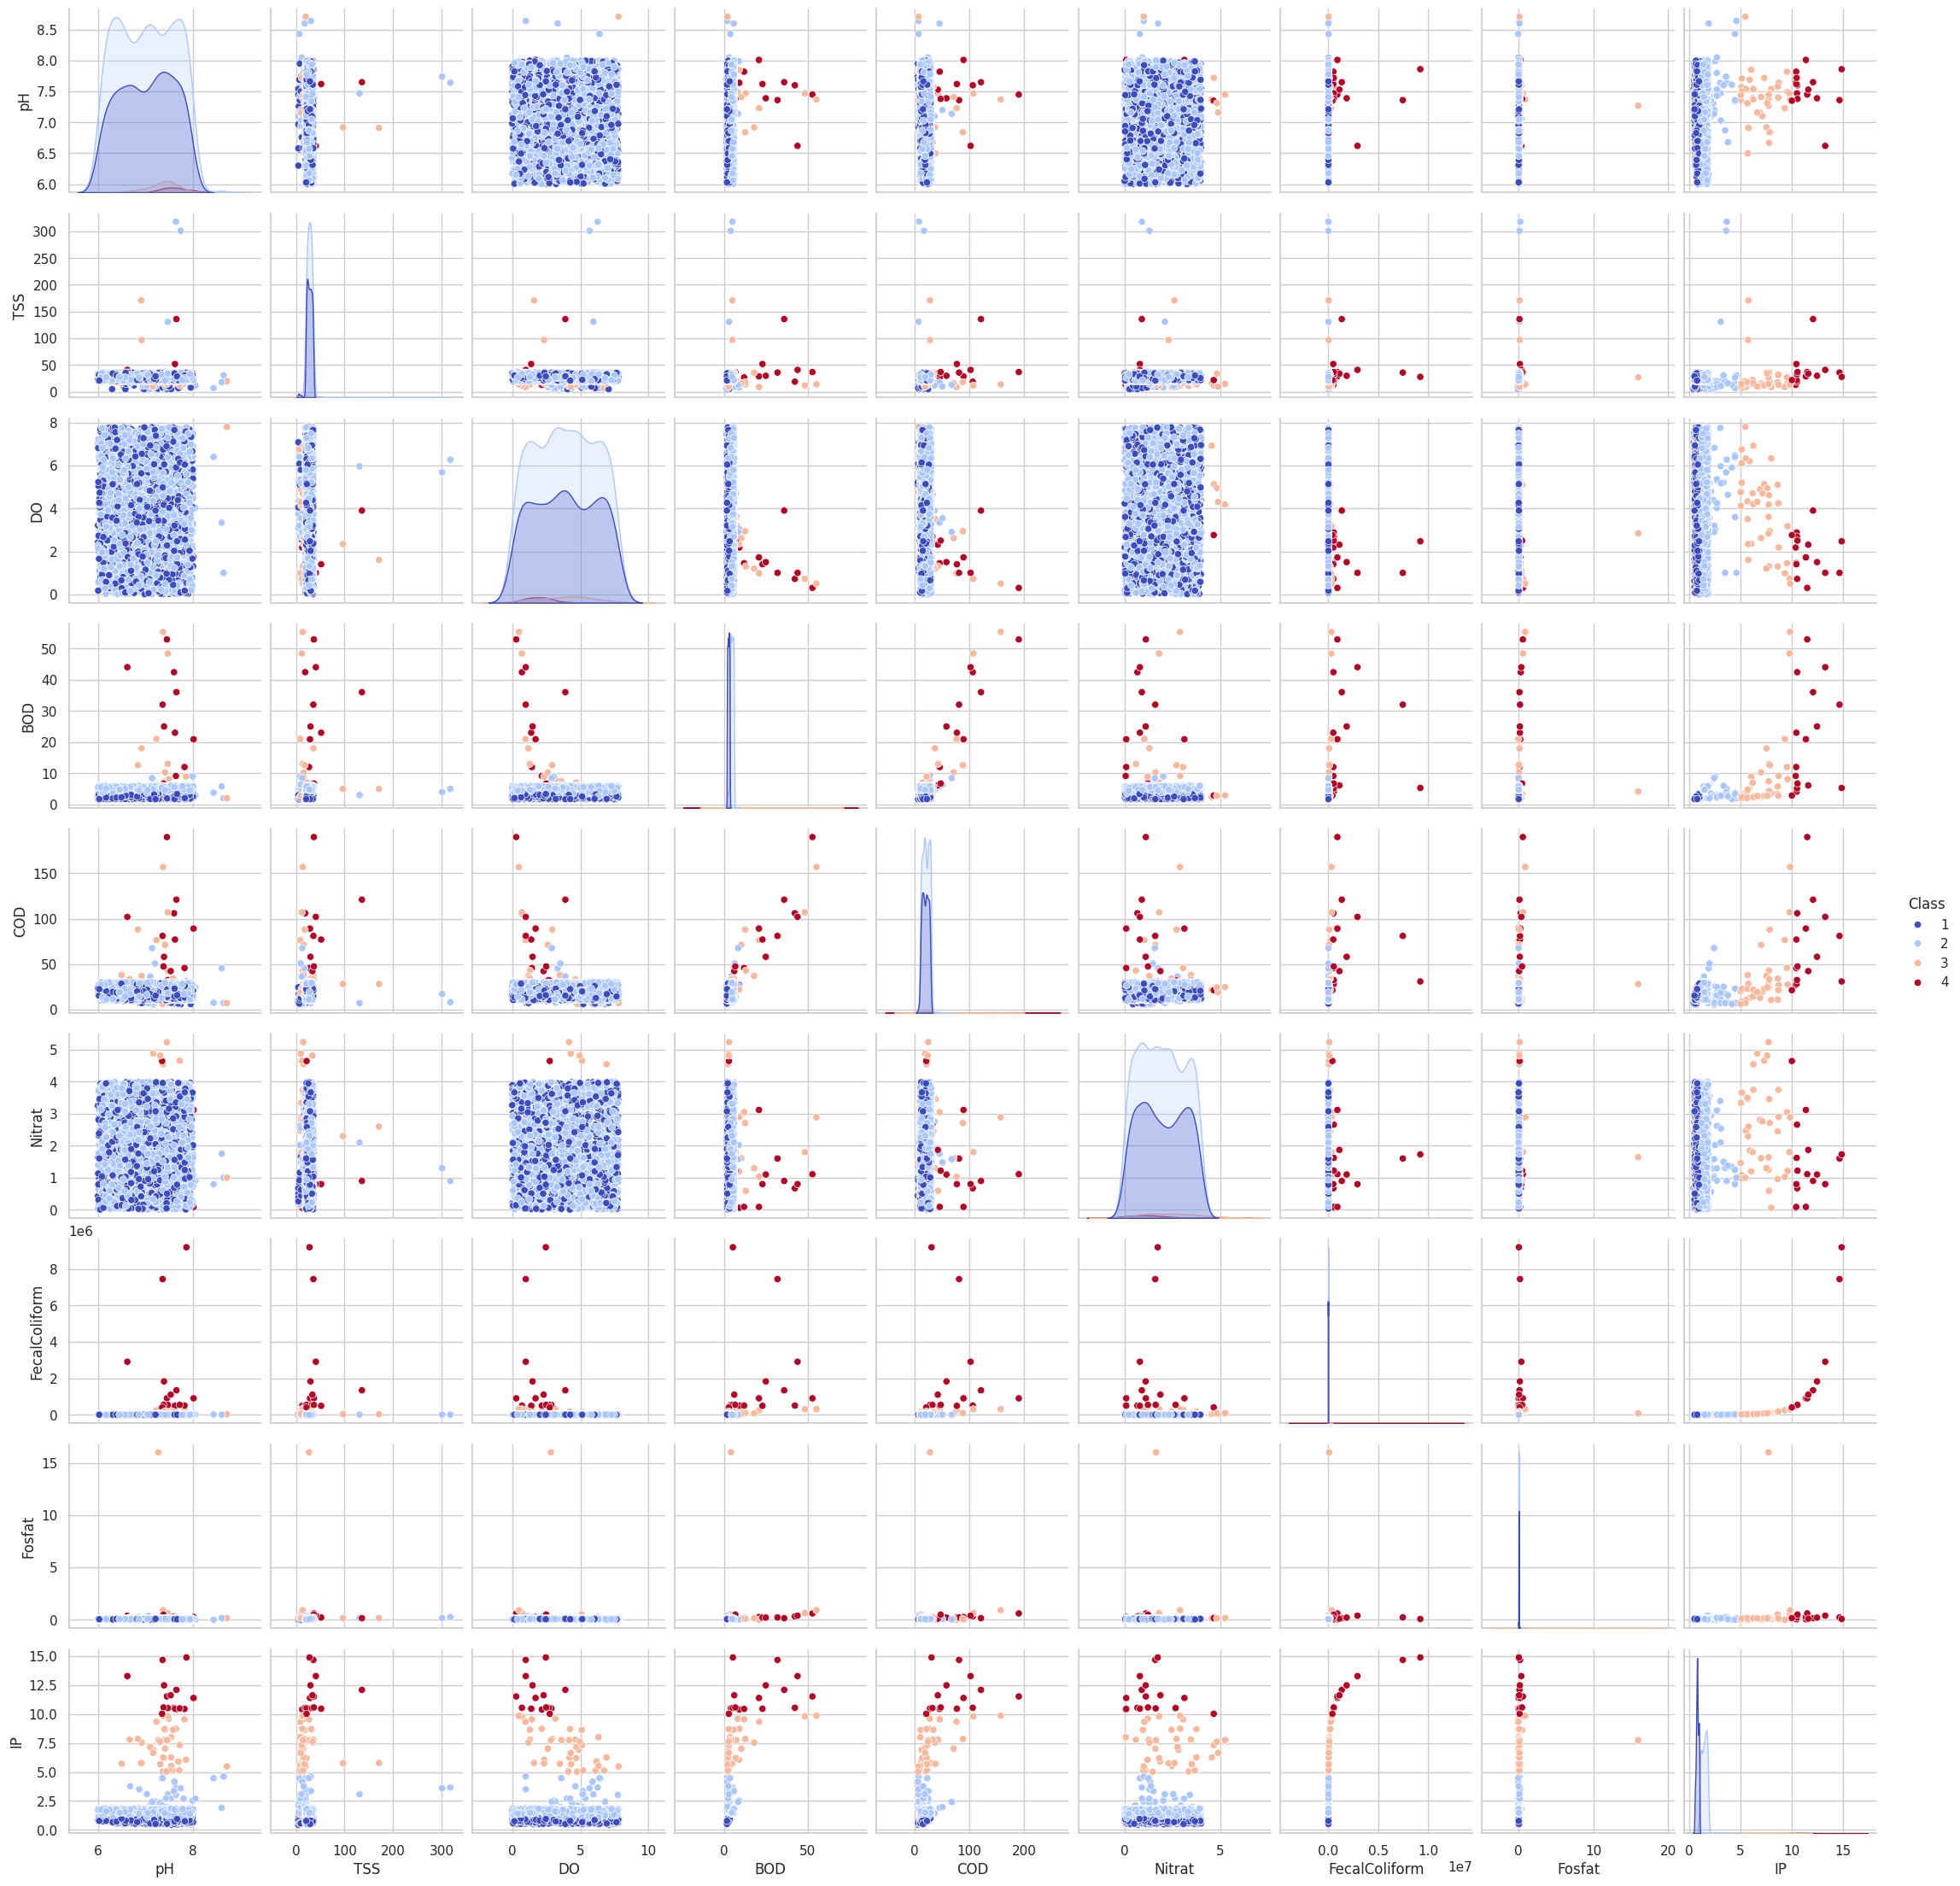

In [27]:
# Step 6: Pairplot to visualize relationships between variables
sns.pairplot(data[numerical_cols + ['Class']], hue='Class', palette='coolwarm')
plt.show()

# **Prompt ChatGPT: berikan kode jika ingin menampilkan matriks evaluasi pada model klasifikasi (Akurasi,Presisi,Recall,F1,AUC,ROC,etc)**

In [29]:
# Step 1: Predict probabilities for the ROC-AUC curve
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class


In [30]:
# Step 2: Calculate various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr')  # AUC for multi-class
conf_matrix = confusion_matrix(y_test, y_pred)

In [31]:
# Step 3: Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 95.80%
Precision: 95.81%
Recall: 95.80%
F1-Score: 95.79%
ROC AUC: 99.84%
Confusion Matrix:
[[184  12   0   0]
 [  8 286   0   0]
 [  0   1   5   0]
 [  0   0   0   4]]


In [36]:
# Step 2: Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test_scaled)

In [37]:
# Step 3: Compute ROC-AUC using 'ovr' for multiclass
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')



In [38]:
# Step 4: Calculate ROC curve for each class
fpr = {}
tpr = {}

In [39]:
# We assume the classes are 2 and 3
for i, class_label in enumerate([2, 3]):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=class_label)


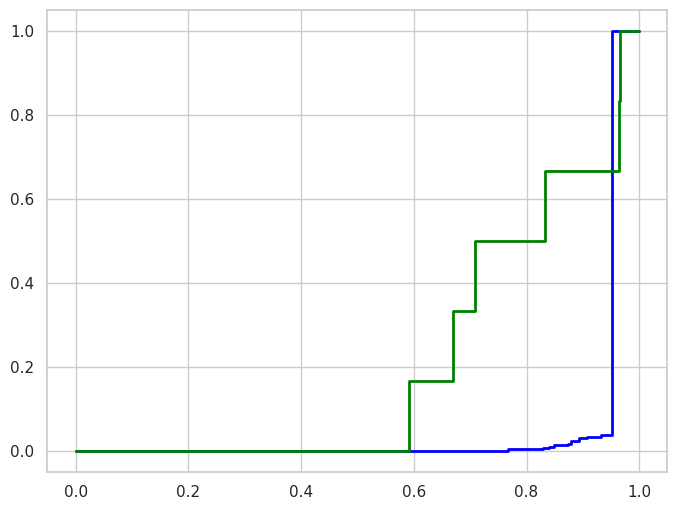

In [40]:
# Step 5: Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green']
for class_label, color in zip([2, 3], colors):
    plt.plot(fpr[class_label], tpr[class_label], color=color, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

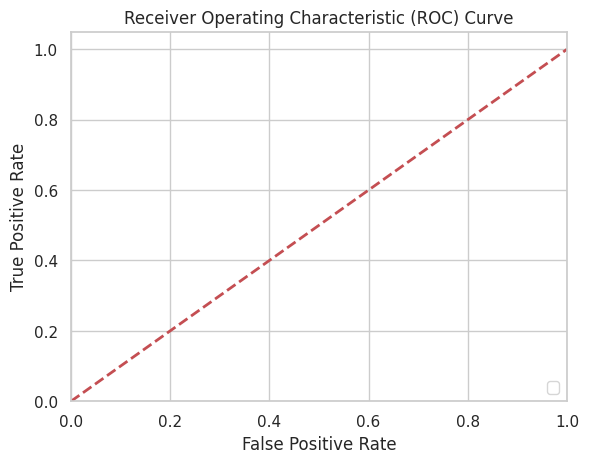

In [41]:
plt.plot([0, 1], [0, 1], 'r--', lw=2)  # Diagonal line (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Step 6: Print the ROC AUC score
print(f"ROC AUC Score (OvR): {roc_auc:.2f}")

ROC AUC Score (OvR): 1.00
